In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

In [26]:
from setup import get_data
from TA_strategies import run_SMA_strategy, run_Mom_strategy, run_MR_strategy
from  ML_strategies import run_Reg_strategy

In [27]:
df = get_data('BT-A.L', 'close', 'TIME_SERIES_DAILY_ADJUSTED')

In [28]:
SMA_data = run_SMA_strategy(df, '2016-01-01', '2019-12-31', 1000, 0.001, 50, 120)[0]
Mom_data = run_Mom_strategy(df, '2016-01-01', '2019-12-31', 1000, 0.001, 3)[0]
MR_data = run_MR_strategy(df, '2016-01-01', '2019-12-31', 1000, 0.001, 40, 5)[0]
log_data = run_Reg_strategy(df, '2010-01-01', '2015-12-31', '2016-01-01', '2019-12-31', 1000, 0.001, 'logistic', 5)[0]
OLS_data = run_Reg_strategy(df, '2010-01-01', '2015-12-31', '2016-01-01', '2019-12-31', 1000, 0.001, 'OLS', 5)[0]

In [29]:
SMA_data = SMA_data.reindex(log_data.index)
Mom_data = Mom_data.reindex(log_data.index)
MR_data = MR_data.reindex(log_data.index)
log_data = log_data.reindex(log_data.index)
OLS_data = OLS_data.reindex(log_data.index)

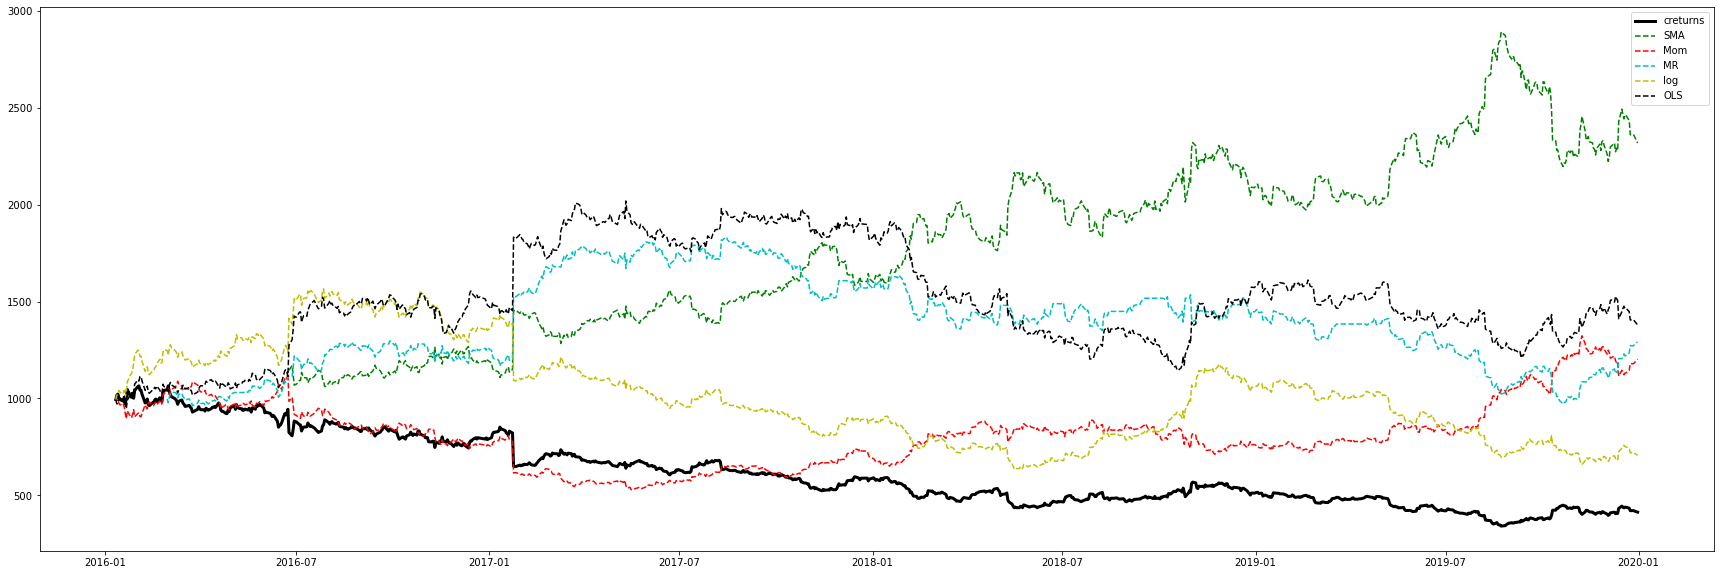

In [30]:
colors = list(mcolors.BASE_COLORS)

plt.figure(figsize=(30,10))
plt.plot(log_data.index, log_data['creturns'], label = 'creturns', color='k', linewidth=3)
plt.plot(log_data.index, SMA_data['cstrategy'], label = 'SMA', linestyle='--', color=colors[1])
plt.plot(log_data.index, Mom_data['cstrategy'], label='Mom', linestyle='--', color=colors[2])
plt.plot(log_data.index, MR_data['cstrategy'], label='MR', linestyle='--', color=colors[3])
plt.plot(log_data.index, log_data['cstrategy'], label='log', linestyle='--', color=colors[5])
plt.plot(log_data.index, OLS_data['cstrategy'], label='OLS', linestyle='--', color=colors[6])
plt.legend()
plt.savefig('timeseries')
plt.show()